<a href="https://colab.research.google.com/github/MinalKharbade/Yes-bank-stock-closing-price/blob/main/Copy_of_YES_BANK_STOCK_CLOSING_PRICE_PREDICTION_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM STATEMENT  <n/>


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

Perform regression analysis using multiple models to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model.


In [ ]:
#Importing The Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import math


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the data 
data=pd.read_csv('/content/drive/MyDrive/Almabetter/Cohort Denver/data_YesBank_StockPrices.csv')

## DATA INSPECTION  <n/>

---



In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
data.shape

(185, 5)

In [ ]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


We have no. of variables in the given dataset[Date, Open, High, Low, Close] 


   
      




Here High and Low tells us about the the max value and the least value of stock of the month.

## DATA CLEANING <N/>

In [ ]:
# checking the null values in dataset
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Here we can say that our data has no null values.

In [ ]:
# checking Duplicate values in dataset
len(data[data.duplicated()])

0

Our data has no duplicate value.

The date format in the data is MM-YYYY. So we change the date for better understanding in YYYY-MM-DD.

In [ ]:
## Required the changing data type of date 
# Here converted the data type of integer into Datetime using the string parse time 
from datetime import datetime

data['Date']=data['Date'].apply(lambda x:datetime.strptime(x,'%b-%y'))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [ ]:
data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


## CHECKING FOR OUTLIERS <N/>

We use boxplot for checking outliers

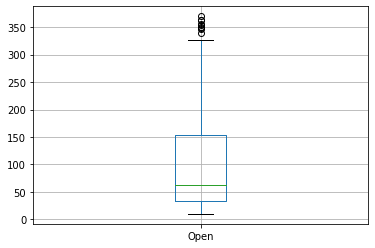

In [ ]:
data.boxplot('Open')

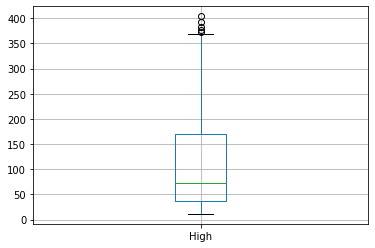

In [ ]:
data.boxplot('High')

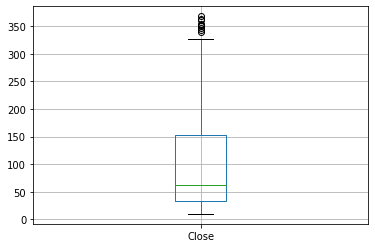

In [ ]:
data.boxplot('Close')

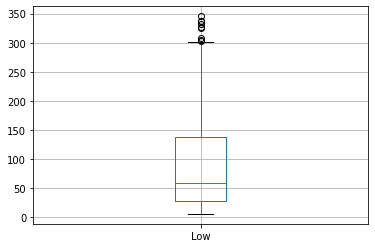

In [ ]:
data.boxplot('Low')

## EXPLORATORY DATA ANALYSIS <N/>

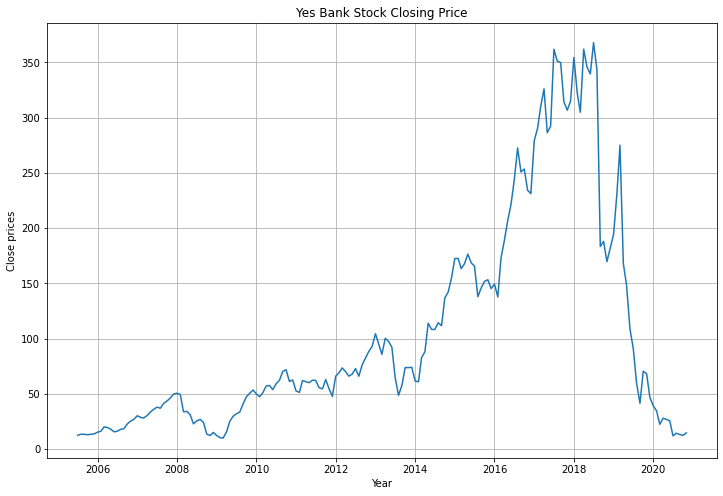

In [ ]:
# plotting the closing price of stocks
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Close prices')
plt.plot(data['Date'], data['Close'])
plt.title('Yes Bank Stock Closing Price')
plt.show()

Since 2010 t0 2018 the trend is increasing but after 2018 it decreases  because of the fraud case involving Rana Kapoor.

Closing price is important for any stock, So we take closing price as our dependent variable. 

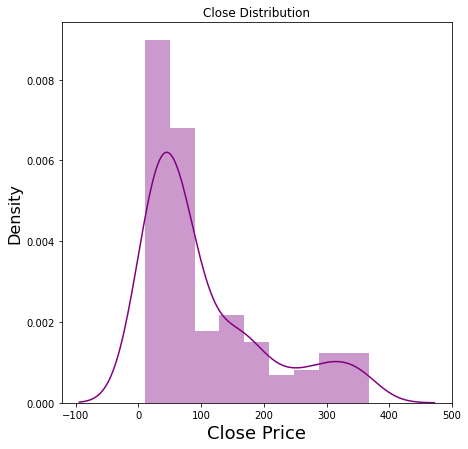

In [ ]:
# Dependent variable is close
# We check the distribution type
plt.figure(figsize=(7,7))
plt.title('Close Distribution')
sns.distplot(data['Close'], color='purple')
plt.xlabel('Close Price', fontsize='18')
plt.ylabel('Density', fontsize='16')
plt.show()

It is right skewed distribution 

To make it normal distribution we use log transformation.

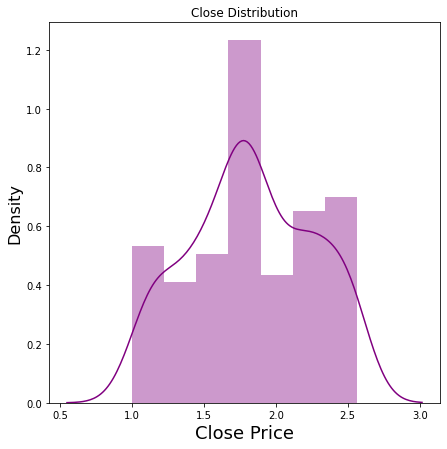

In [ ]:
# Distribution plot of closing price for applying log transformation
plt.figure(figsize=(7,7))
plt.title('Close Distribution')
sns.distplot(np.log10(data['Close']), color='purple')
plt.xlabel('Close Price', fontsize='18')
plt.ylabel('Density', fontsize='16')
plt.show()

- After applying log transformation, distribution of closing price is close to normal

## CLOSE IS DEPENDENT VARIABLE REST ALL ( OPEN, HIGH, LOW ) ARE INDEPENDENT VARIABLE  

## PLOTTING DISTRIBUTION FOR NUMERICAL FEATURE

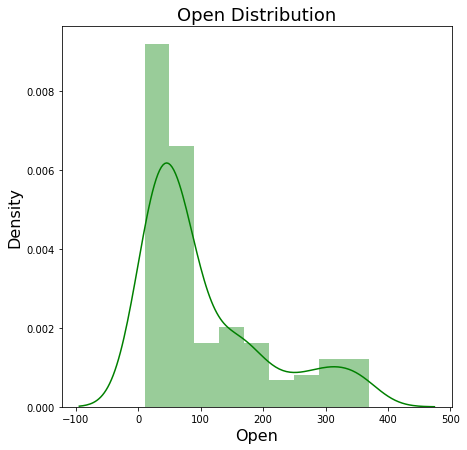

In [ ]:
# Plotting distribution for Open
plt.figure(figsize=(7,7))
plt.title('Open Distribution',fontsize='18')
sns.distplot(data['Open'],color='green')
plt.xlabel('Open', fontsize='16')
plt.ylabel('Density', fontsize='16')
plt.show()

It is numerical feature looks rightly skewed.

To make it normal distribution we use log transformation.

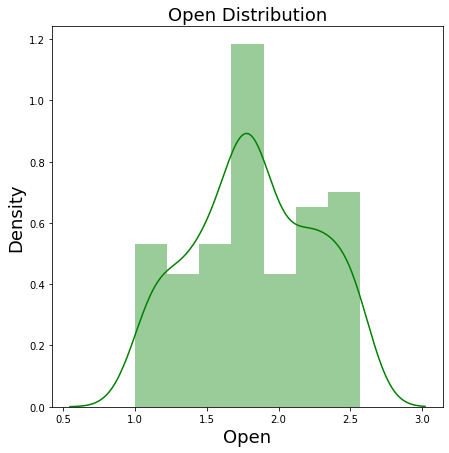

In [ ]:
# Distribution plot of open for applying log transformation
plt.figure(figsize=(7,7))
plt.title('Open Distribution', fontsize='18')
sns.distplot(np.log10(data['Open']), color='green')
plt.xlabel('Open', fontsize='18')
plt.ylabel('Density', fontsize='18')
plt.show()

- After applying log transformation, distribution of open is close to normal.

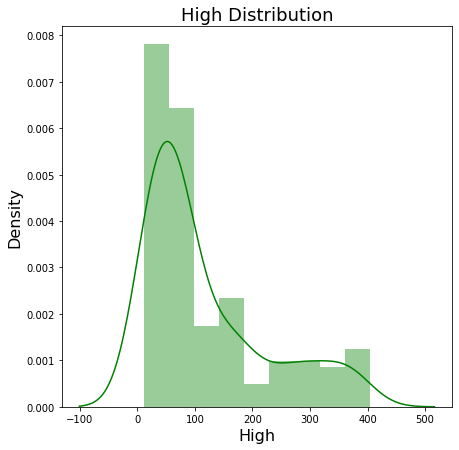

In [ ]:
# Plotting distribution for High
plt.figure(figsize=(7,7))
plt.title('High Distribution',fontsize='18')
sns.distplot(data['High'],color='green')
plt.xlabel('High', fontsize='16')
plt.ylabel('Density', fontsize='16')
plt.show()

It is numerical feature looks rightly skewed.

To make it normal distribution we use log transformation.

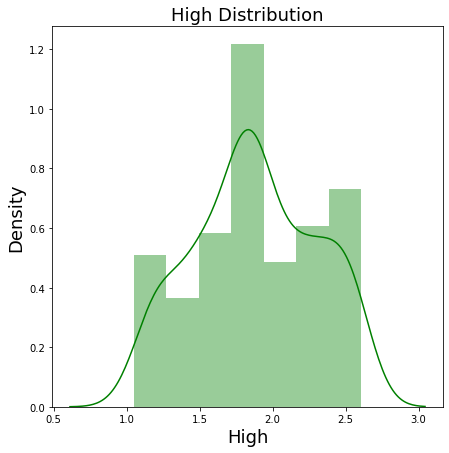

In [ ]:
# Distribution plot of high for applying log transformation
plt.figure(figsize=(7,7))
plt.title('High Distribution', fontsize='18')
sns.distplot(np.log10(data['High']), color='green')
plt.xlabel('High', fontsize='18')
plt.ylabel('Density', fontsize='18')
plt.show()

- After applying log transformation, distribution of high is close to normal.

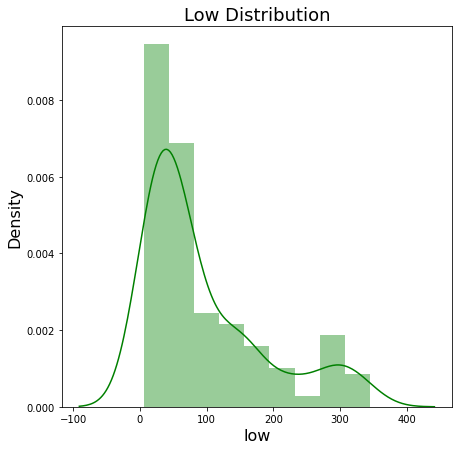

In [ ]:
# Plotting distribution for Low
plt.figure(figsize=(7,7))
plt.title('Low Distribution',fontsize='18')
sns.distplot(data['Low'],color='green')
plt.xlabel('low', fontsize='16')
plt.ylabel('Density', fontsize='16')
plt.show()

It is numerical feature looks rightly skewed.

To make it normal distribution we use log transformation.

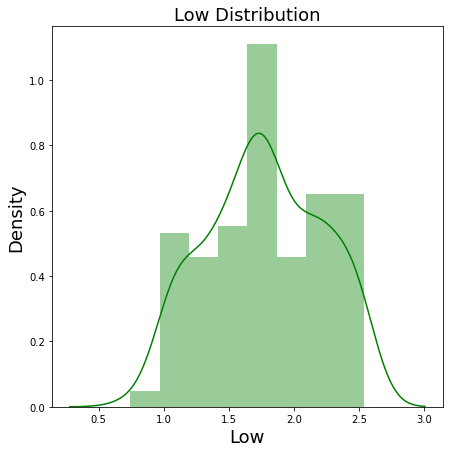

In [ ]:
# Distribution plot of low for applying log transformation
plt.figure(figsize=(7,7))
plt.title('Low Distribution', fontsize='18')
sns.distplot(np.log10(data['Low']), color='green')
plt.xlabel('Low', fontsize='18')
plt.ylabel('Density', fontsize='18')
plt.show()

- After applying log transformation, distribution of low is close to normal.

In [ ]:
# Now we find the correlation between between independent variable and the independent variable
# We use scatter plot with best fit line
plt.scatter(data['Close'],data['Open'],alpha=0.5) 
plt.title('Scatter plot of open or close')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x='Open',y='Close',data=data)
plt.show()

SyntaxError: ignored

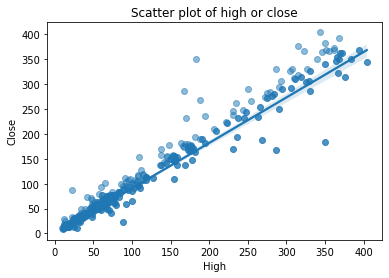

In [ ]:
plt.scatter(data['Close'],data['High'],alpha=0.5) 
plt.title('Scatter plot of high or close')
plt.xlabel('High')
plt.ylabel('Class')
sns.regplot(x='High',y='Close',data=data)
plt.show()

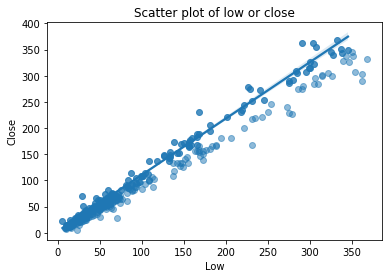

In [ ]:
plt.scatter(data['Close'],data['Low'],alpha=0.5) 
plt.title('Scatter plot of low or close')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x='Low',y='Close',data=data)
plt.show()

## CORRELATION <n/>

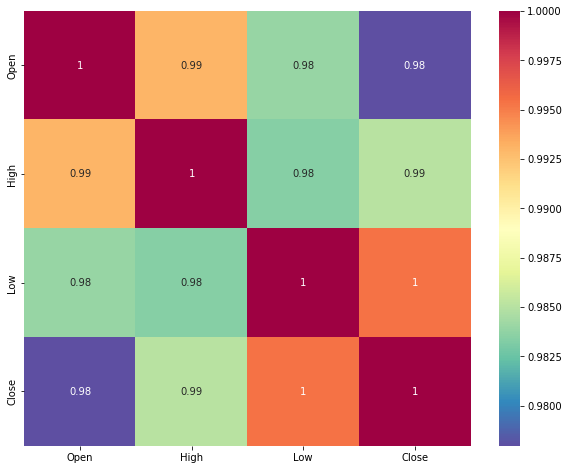

In [ ]:
plt.figure(figsize=(10,8))
correlation=data.corr()
sns.heatmap(abs(correlation),annot=True , cmap='Spectral_r')

From the above heatmap we see that all variables are highly correlated .

In [ ]:
# multicorrelinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

In [ ]:
cal_vif(data[[i for i in data.describe().columns if i not in ['Date', 'Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predict future values



We have the very High VIF of Open, High, Low fetures in our dataset so we have to drop them which is least correlated with dependent variable

In [ ]:
#Here we will drop the open feature from the VIP Matrix
cal_vif(data[[i for i in data.describe().columns if i not in ['Date','Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


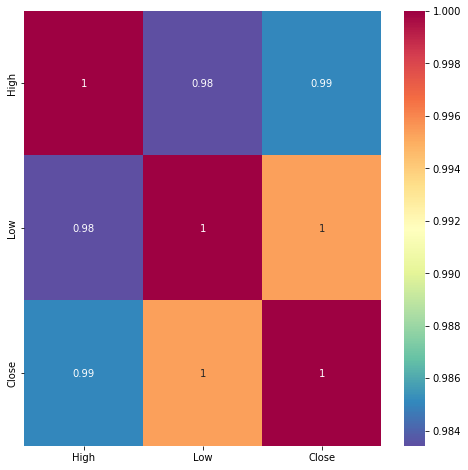

In [ ]:
# Correlation plot between all remaining variables
plt.figure(figsize=(8,8))
sns.heatmap(data[['High','Low','Close']].corr(),annot=True,cmap='Spectral_r')
plt.show()

## TRAIN TEST SPLIT <n/>

Now we split our data for training and testing the model.

X = Independent variable

Y = Dependent variable

In [ ]:
#Splitting our dataset into dependent and independent variables

X=data.drop(columns=['Close','Date'])
y=data['Close']

In [ ]:
#Data Transformation
from scipy.stats import zscore
X=X.apply(zscore)
y=np.log10(y)

In [ ]:
#Splitting the data into training set and testing set data
#Splitting the data with 75-25
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
#Shape of the training Data
print(X_train.shape)

(138, 3)


In [ ]:
#Shape of the testing Data
print(X_test.shape)

(47, 3)


In [ ]:
#Transforming Data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

 Now we will try to build 4 Regession model for our data

 Linear Regression 

 Lasso Regression

 Ridge Regression

 Elastic Net Regression 

## LINEAR REGRESSION 

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [ ]:
# The train accuracy for linear regression model
round(regressor.score(X_train , y_train),3)

0.815

In [ ]:
# The test accuracy for linear regression model
round(regressor.score(X_test , y_test),3)

0.821

In [ ]:
# Prediction for the test data
y_pred=regressor.predict(X_test)
y_pred

array([1.51506951, 1.53007053, 1.6338408 , 1.47331468, 2.01203815,
       2.74571136, 1.62424543, 1.51579302, 1.52182338, 1.61911289,
       2.07616439, 1.61386397, 1.47128237, 2.63727083, 1.7026155 ,
       1.60863322, 1.52272745, 1.95293087, 1.81467167, 1.7617921 ,
       1.52963611, 1.47874367, 1.83742236, 1.63548861, 2.0585664 ,
       1.4883942 , 1.47466856, 1.61172726, 1.53358657, 1.66781466,
       2.4117997 , 2.76099043, 1.6812551 , 2.34816704, 1.77949846,
       1.62233458, 2.33838657, 1.63797637, 1.63747304, 2.06620439,
       2.79806962, 2.07171275, 1.52396996, 1.47250394, 2.18048026,
       1.9670759 , 1.80921693])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194, 1.73102438, 1.7451529 , 2.21942733,
       2.54549267, 2.24679392, 1.43088095, 1.13703745, 2.31468865,
       2.16411482, 1.97543181])

In [ ]:
#Creating the Data of test and test Data
train_dataset=pd.DataFrame(X_train,y_train)
test_data=pd.DataFrame(10**y_test)
test_data.rename(columns={'Close':'Actual Closing Price'},inplace=True)

In [ ]:
test_data['Predicted Closing Price']=10**y_pred
test_data.head()

,Actual Closing Price,Predicted Closing Price
16,25.32,32.739309
179,25.60,33.889919
66,52.59,43.036882
40,12.26,29.738200
166,147.95,102.810660


## EVALUATION OF LINEAR REGRESSION MODEL

In [ ]:
#Test performance of linear Regression
print('MSE:',round(mean_squared_error(y_test,y_pred),3))
print('MSE:',round(math.sqrt(mean_squared_error(y_test,y_pred)),3))
print('MAE:',round(mean_absolute_error(y_test,y_pred),3))
print('MAPE:',round(mean_absolute_percentage_error(y_test,y_pred),3))
print('r2:',round(r2_score(y_test,y_pred),3))

MSE: 0.032
MSE: 0.18
MAE: 0.156
MAPE: 0.096
r2: 0.821


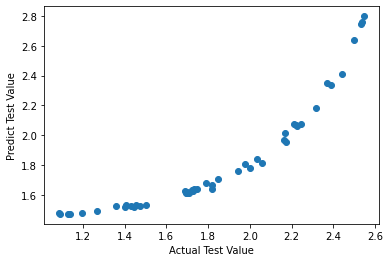

In [ ]:
# Plotting scatter plot between Y_test and Y_predict
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Test Value') 
plt.ylabel('Predict Test Value')
plt.show()

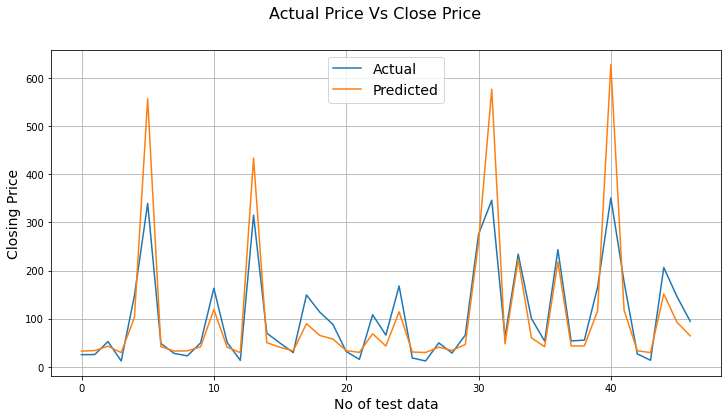

In [ ]:
#Actual Price vs predicted price for Linear Regression Plot
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Price Vs Close Price',fontsize=16)
plt.legend(['Actual','Predicted'],fontsize=14)
plt.xlabel('No of test data',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.grid()

Lasso and Ridge are the types of regularization techniques. Regularization Techniques deals with overfitting when dataset is large. Lasso and Ridge involve adding penalties to the regression function.

## IMPLEMENTATION OF LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.005,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.005, max_iter=3000)

In [ ]:
round(lasso.score(X_train,y_train),3)

0.813

In [ ]:
y_pred_lasso=lasso.predict(X_test)
y_pred_lasso

array([1.52930382, 1.54391275, 1.64521644, 1.49033866, 2.00618917,
       2.70383379, 1.63764886, 1.529781  , 1.537685  , 1.62956214,
       2.06586901, 1.62328207, 1.48815398, 2.59679048, 1.70867655,
       1.61957987, 1.53683682, 1.94906501, 1.81131724, 1.76343082,
       1.54409621, 1.49610453, 1.83707985, 1.64222756, 2.04694391,
       1.50452009, 1.49166851, 1.62098299, 1.54771631, 1.67719494,
       2.37765508, 2.72152821, 1.69024066, 2.32785495, 1.77960425,
       1.63163455, 2.30966047, 1.64702785, 1.64838107, 2.05545601,
       2.7541185 , 2.06057988, 1.53787791, 1.48926481, 2.16174303,
       1.95870191, 1.8111637 ])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194, 1.73102438, 1.7451529 , 2.21942733,
       2.54549267, 2.24679392, 1.43088095, 1.13703745, 2.31468865,
       2.16411482, 1.97543181])

In [ ]:
#Test performance of Lasso Regression model
print('MSE:',round(mean_squared_error(y_test,y_pred_lasso),3))
print('MSE:',round(math.sqrt(mean_squared_error(y_test,y_pred_lasso)),3))
print('MAE:',round(mean_absolute_error(y_test,y_pred_lasso),3))
print('MAPE:',round(mean_absolute_percentage_error(y_test,y_pred_lasso),3))
print('r2:',round(r2_score(y_test,y_pred_lasso),3))

MSE: 0.033
MSE: 0.182
MAE: 0.158
MAPE: 0.098
r2: 0.816


Text(0, 0.5, 'Predicted value')

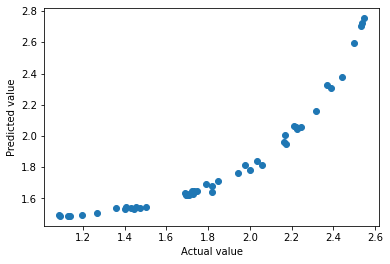

In [ ]:
plt.scatter((y_test),(y_pred_lasso))
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

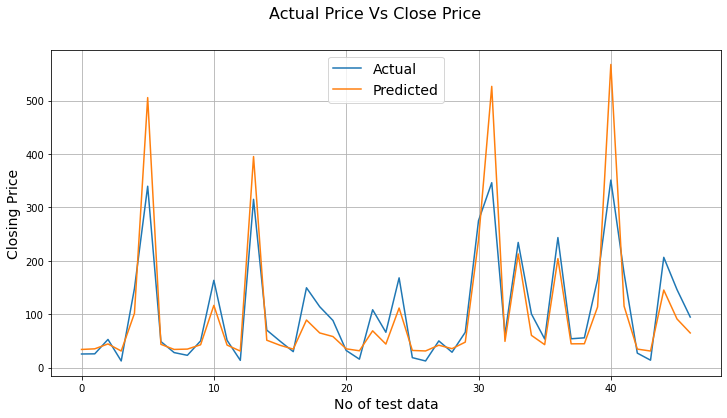

In [ ]:
# Actual vs Predicted value plot for Lasso Regresion
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Price Vs Close Price',fontsize=16)
plt.legend(['Actual','Predicted'],fontsize=14)
plt.xlabel('No of test data',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.grid()

## IMPLEMENTATION OF CROSS VALIDATION OF LASSO

In [ ]:
#Importing the Gridsearch 
from sklearn.model_selection import GridSearchCV

In [ ]:
#Hyper Parameter of Tunning for Lasso Regression
lasso=Lasso()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=3,return_train_score=True)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print('The best fit alfha value is found to be:',round(lasso_regressor.best_params_['alpha'],3))
print('The negative mean squared error is:',round(lasso_regressor.best_score_,3))

The best fit alfha value is found to be: 0.001
The negative mean squared error is: -0.035


In [ ]:
#Prediction for Test data
y_pred_lasso=lasso_regressor.predict(X_test)
y_pred_lasso

array([1.51737704, 1.53270531, 1.63782991, 1.47671048, 2.01211296,
       2.74319191, 1.62893928, 1.51758563, 1.52589648, 1.62175396,
       2.07633821, 1.61579445, 1.47495029, 2.63175442, 1.70481497,
       1.611473  , 1.52515332, 1.954452  , 1.80984125, 1.76135181,
       1.53271527, 1.48288133, 1.83832432, 1.63411916, 2.05721554,
       1.49194989, 1.47807087, 1.61299282, 1.53673624, 1.67147187,
       2.39955936, 2.76017923, 1.68474484, 2.34835834, 1.77785721,
       1.6243046 , 2.33102178, 1.64036774, 1.64120261, 2.06602904,
       2.79494448, 2.07138025, 1.52650673, 1.47606958, 2.17628171,
       1.96404626, 1.8112082 ])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194, 1.73102438, 1.7451529 , 2.21942733,
       2.54549267, 2.24679392, 1.43088095, 1.13703745, 2.31468865,
       2.16411482, 1.97543181])

In [ ]:
#Test Performance
print('MSE:',round(mean_squared_error(y_test,y_pred_lasso),3))
print('MSE:',round(math.sqrt(mean_squared_error(y_test,y_pred_lasso)),3))
print('MAE:',round(mean_absolute_error(y_test,y_pred_lasso),3))
print('MAPE:',round(mean_absolute_percentage_error(y_test,y_pred_lasso),3))
print('r2:',round(r2_score(y_test,y_pred_lasso),3))

MSE: 0.033
MSE: 0.181
MAE: 0.157
MAPE: 0.096
r2: 0.819


Text(0, 0.5, 'Predicted value')

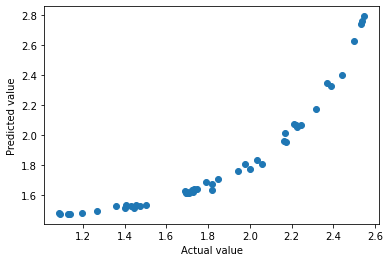

In [ ]:
plt.scatter((y_test),(y_pred_lasso))
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

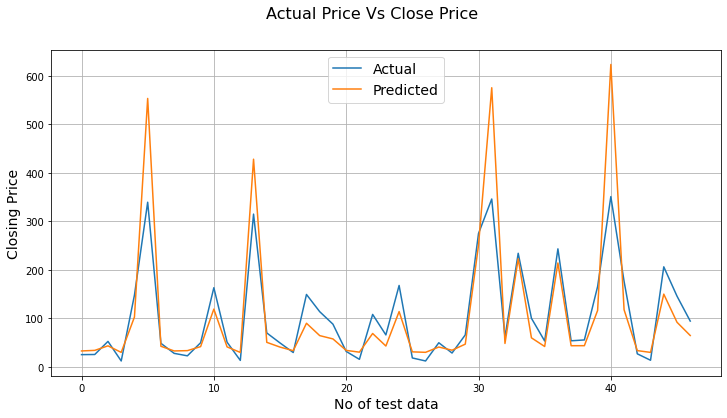

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Price Vs Close Price ',fontsize=16)
plt.legend(['Actual','Predicted'],fontsize=14)
plt.xlabel('No of test data',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.grid()

## IMPLEMENTATION OF RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#Accuracy Of ridge regression
round(ridge.score(X_train,y_train),3)


0.814

In [ ]:
#Prediction of test data
y_pred_ridge=ridge.predict(X_test)
y_pred_ridge

array([1.51462678, 1.53049375, 1.63957728, 1.47478743, 2.0170801 ,
       2.7515262 , 1.63267414, 1.5145269 , 1.52581613, 1.62122081,
       2.07998344, 1.61353994, 1.47272132, 2.63431776, 1.70428772,
       1.610884  , 1.52276918, 1.95808996, 1.80429136, 1.75896257,
       1.53129644, 1.48181441, 1.83861871, 1.62963344, 2.05786421,
       1.48991486, 1.47620885, 1.61033116, 1.53517003, 1.67294223,
       2.39442952, 2.77274984, 1.68660274, 2.3575717 , 1.77460925,
       1.62247255, 2.32825527, 1.63930765, 1.64257855, 2.06840088,
       2.80411328, 2.07362091, 1.52396033, 1.47377335, 2.17584993,
       1.9625235 , 1.8126054 ])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194, 1.73102438, 1.7451529 , 2.21942733,
       2.54549267, 2.24679392, 1.43088095, 1.13703745, 2.31468865,
       2.16411482, 1.97543181])

In [ ]:
#Test Performance of Ridge Regression model
print('MSE:',round(mean_squared_error(y_test,y_pred_ridge),3))
print('MSE:',round(math.sqrt(mean_squared_error(y_test,y_pred_ridge)),3))
print('MAE:',round(mean_absolute_error(y_test,y_pred_ridge),3))
print('MAPE:',round(mean_absolute_percentage_error(y_test,y_pred_ridge),3))
print('r2:',round(r2_score(y_test,y_pred_ridge),3))

MSE: 0.033
MSE: 0.181
MAE: 0.157
MAPE: 0.096
r2: 0.819


Text(0, 0.5, 'Predicted value')

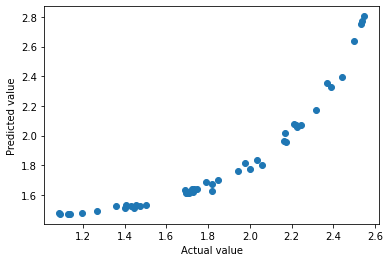

In [ ]:
plt.scatter((y_test),(y_pred_ridge))
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

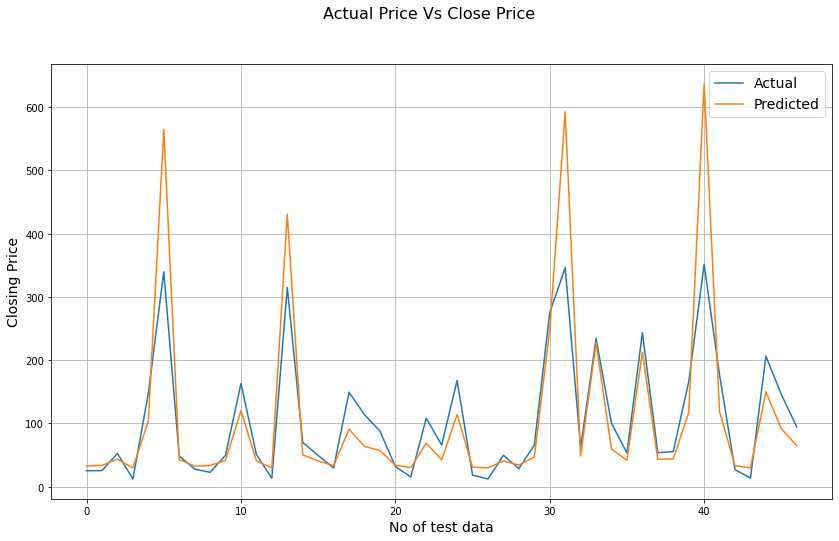

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Price Vs Close Price',fontsize=16)
plt.legend(['Actual','Predicted'],fontsize=14)
plt.xlabel('No of test data',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.grid()

## IMPLEMENTATION OF CROSS VALIDATION OF RIDGE 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Hyperparameter Of Tunning for Ridge Regresion
ridge=Ridge()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=3)

In [ ]:
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print('The best fit alfha value is found to be:',round(ridge_regressor.best_params_['alpha'],3))
print('The negative mean squared error is:',round(ridge_regressor.best_score_,3))

The best fit alfha value is found to be: 1
The negative mean squared error is: -0.035


In [ ]:
# Prediction for X test
y_pred_ridge1=ridge_regressor.predict(X_test)
y_pred_ridge1

array([1.52189652, 1.53773895, 1.64947266, 1.48512982, 2.02038742,
       2.72135779, 1.64807227, 1.52191648, 1.53727111, 1.62779192,
       2.07438277, 1.61650225, 1.48159252, 2.59967426, 1.70615744,
       1.61754079, 1.53043258, 1.95785184, 1.79816143, 1.75673429,
       1.54013291, 1.4928759 , 1.83686063, 1.63137415, 2.04721489,
       1.4984971 , 1.48664153, 1.61363009, 1.54309752, 1.68036442,
       2.36556602, 2.7513929 , 1.69474109, 2.35134591, 1.77111062,
       1.62613457, 2.30101208, 1.64344395, 1.65160989, 2.06014617,
       2.77443861, 2.06492015, 1.53076038, 1.48257503, 2.15980941,
       1.95491694, 1.81388266])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194, 1.73102438, 1.7451529 , 2.21942733,
       2.54549267, 2.24679392, 1.43088095, 1.13703745, 2.31468865,
       2.16411482, 1.97543181])

In [ ]:
#Test Performance
print('MSE:',round(mean_squared_error(y_test,y_pred_ridge1),3))
print('MSE:',round(math.sqrt(mean_squared_error(y_test,y_pred_ridge1)),3))
print('MAE:',round(mean_absolute_error(y_test,y_pred_ridge1),3))
print('MAPE:',round(mean_absolute_percentage_error(y_test,y_pred_ridge1),3))
print('r2:',round(r2_score(y_test,y_pred_ridge1),3))

MSE: 0.033
MSE: 0.182
MAE: 0.158
MAPE: 0.097
r2: 0.816


Text(0, 0.5, 'Predicted value')

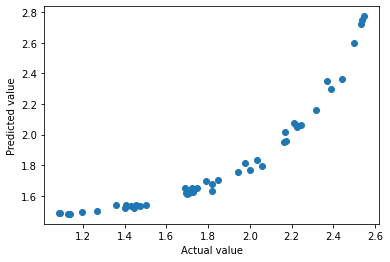

In [ ]:
plt.scatter((y_test),(y_pred_ridge1))
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

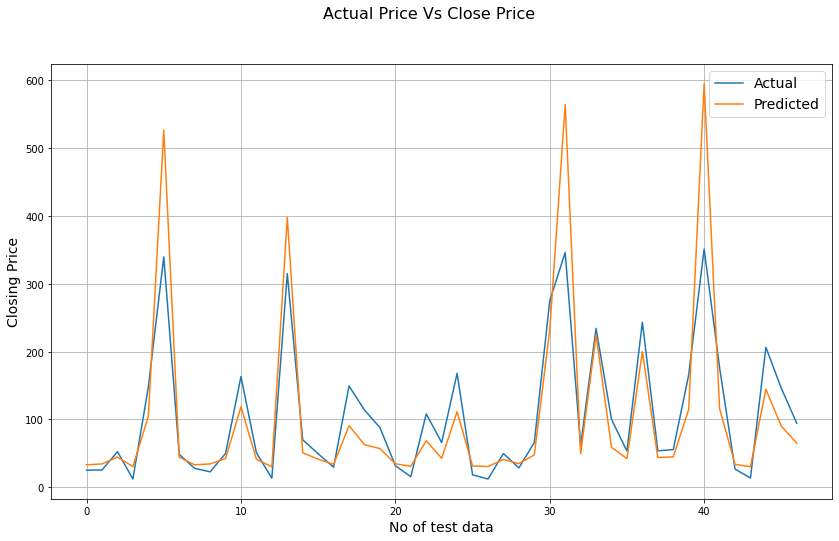

In [ ]:
#Actual Price vs Predicted Price For Ridge Regression
plt.figure(figsize=(14,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge1))
plt.suptitle('Actual Price Vs Close Price',fontsize=16)
plt.legend(['Actual','Predicted'],fontsize=14)
plt.xlabel('No of test data',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.grid()

## XGBOOST REGRESSOR

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library.It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

In [ ]:
# Fitting the data into XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

[23:02:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgb.score(X_train,y_train)

0.9990942006981812

In [ ]:
y_pred_XG = xgb.predict(X_test)
y_pred_XG

array([1.3214781, 1.4620574, 1.7561089, 1.1535002, 2.192355 , 2.5045195,
       1.686496 , 1.4014559, 1.4620574, 1.7123592, 2.2333395, 1.7106364,
       1.0949808, 2.5011263, 1.8553416, 1.6868652, 1.4403758, 2.1457655,
       2.0176663, 1.9506654, 1.4620574, 1.1948961, 2.0369766, 1.7331635,
       2.2333395, 1.2879452, 1.1535002, 1.718653 , 1.4787076, 1.7925445,
       2.4241123, 2.521853 , 1.8574066, 2.361483 , 1.9506654, 1.7565457,
       2.3704271, 1.7531208, 1.7561089, 2.2333395, 2.517662 , 2.2333395,
       1.4375132, 1.1126165, 2.2942004, 2.1457655, 2.002658 ],
      dtype=float32)

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194, 1.73102438, 1.7451529 , 2.21942733,
       2.54549267, 2.24679392, 1.43088095, 1.13703745, 2.31468865,
       2.16411482, 1.97543181])

In [ ]:
# Test Performance of XGBoost model after validation

print("MSE :",round(mean_squared_error(y_test, y_pred_XG), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_XG)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_XG),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_XG),3))
print("R2 :",round(r2_score(y_test, y_pred_XG), 3))

MSE : 0.001
RMSE : 0.037
MAE : 0.028
MAPE : 0.018
R2 : 0.993


Text(0, 0.5, 'Predicted Value')

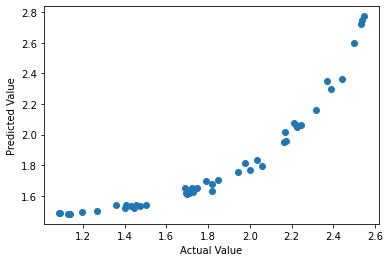

In [ ]:
plt.scatter((y_test),(y_pred_ridge1))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

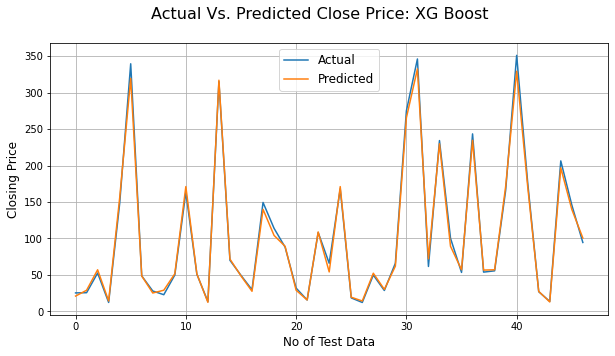

In [ ]:
# Actual Price vs. Predicted Price for XGboost after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_XG))
plt.suptitle('Actual Vs. Predicted Close Price: XG Boost', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

## CONCLUSION

1. The popularity of stock closing is growing rapidly day by day which encourage researcher to find new methods if any fraud happens.

2. The techniques we use for prediction is not only help researcher to predict the future stock closing price or and fraud but also  helps investors or any person who dealing with the stock market in order to prediction of model with good accuracy.

3. In this we use Linear Regression, Lasso Regression and Ridge Regression techniques and these gives us folowing result.

4. Inependent variables ( High, Low and Open ) are directly correlated with Dependent variable ( Closing Price ).

5. Dependent variable is strongly dependent on Indepedent variable.

6. Xgboost regression is best model for yes bank stock closing price data this model use for further prediction.
